# IaaS-Sen4CAP Python client demonstration

In this demonstration, we will create an Python API client for IaaS-Sen4CAP, and use it to list available processes, execute a process as a job, monitor the job's progress, and fetch and display the results

## Authentication and client creation

First, import some necessary libraries.

In [1]:
import sen4cap_client.api

import cuiman
import gavicore
import httpx
import pystac
import rioxarray

Set up an authentication/authorization configuration which uses a username and password to fetch an authorization token to use the service.

In [2]:
auth_config = cuiman.api.auth.AuthConfig(
    auth_type="login",
    username="admin",
    password="admin",
    auth_url="http://localhost:8080/auth/login"
)

Fetch the authorization token using the configuration we created above.

In [3]:
token = cuiman.api.auth.login(auth_config)
token

'4f4ed438-4348-474e-8f57-d0a12c7190f2'

Create a client configuration using the token we fetched.

In [4]:
sen4cap_client_config = sen4cap_client.api.Sen4CAPConfig(
    auth_type="token",
    token=token,
    auth_url="http://localhost:8080/auth/login",
)

Create a Sen4CAP client instance using the configuration we just created.

In [5]:
client = sen4cap_client.api.Client(
    config=sen4cap_client_config,
    api_url="http://localhost:8080/process/",
    _debug=True,
)

## Find and execute a process

First, let's take a look at what processes are available.

In [6]:
processes = client.get_processes()
processes

ProcessList(processes=[ProcessSummary(title='L3B NDVI Processor 5.0', description='Sen4CAP L3B NDVI Processor', keywords=None, metadata=None, additionalParameters=None, id='71', version='1.0', jobControlOptions=[<JobControlOptions.async_execute: 'async-execute'>], outputTransmission=[<TransmissionMode.value: 'value'>], links=None), ProcessSummary(title='L3BProcessor - NDVI - TESTS', description='Sen4CAP L3B NDVI Processor ', keywords=None, metadata=None, additionalParameters=None, id='47', version='1.0', jobControlOptions=[<JobControlOptions.async_execute: 'async-execute'>], outputTransmission=[<TransmissionMode.value: 'value'>], links=None), ProcessSummary(title='L3BProcessor - LAI', description='Sen4CAP L3B LAI Processor ', keywords=None, metadata=None, additionalParameters=None, id='6', version='1.0', jobControlOptions=[<JobControlOptions.async_execute: 'async-execute'>], outputTransmission=[<TransmissionMode.value: 'value'>], links=None), ProcessSummary(title='L3BProcessor - NDVI',

Let's pick the first process in the list (with ID code 71) and get some more details about it.

In [7]:
process_description = client.get_process(71)
process_description

ProcessDescriptionX(title='L3B NDVI Processor 5.0', description='Sen4CAP L3B NDVI Processor', keywords=None, metadata=None, additionalParameters=None, id='71', version='1.0', jobControlOptions=None, outputTransmission=None, links=None, inputs={'96e687c8-9190-464d-8ddf-65d63d118ec8': InputDescriptionX(title='prddestroot', description='Destination mounted root directory', keywords=None, metadata=None, additionalParameters=None, minOccurs=1, maxOccurs=None, schema_=Schema(field_ref=None, title='Parameter Schema', multipleOf=None, maximum=None, exclusiveMaximum=False, minimum=None, exclusiveMinimum=False, maxLength=255, minLength=1, pattern=None, maxItems=None, minItems=0, uniqueItems=False, maxProperties=None, minProperties=0, required=None, enum=None, type=<DataType.string: 'string'>, not_=None, allOf=None, oneOf=None, anyOf=None, discriminator=None, items=None, properties=None, additionalProperties=True, description='Destination mounted root directory', format=None, default='/SEN4CAP_L3

We can use the `create_execution_request` method to make a template execution request which we can adapt afterwards with our preferred parameters.

In [8]:
execution_request = client.create_execution_request(71)
execution_request

ExecutionRequest(inputs={'96e687c8-9190-464d-8ddf-65d63d118ec8': '/SEN4CAP_L3B', '28bc4311-28ff-4c9f-b5d4-51c0657a465d': 'l3b', 'a5c21752-e0c5-4108-b042-5af3e9ec9f39': 'l3b', '4fc70075-e3f4-4055-88eb-3295099b3d8b': 'L3B', '0fcb398b-f720-4a0e-b98a-b68934a6c581': '0', 'a8df8129-544a-41ec-bdf4-107d18a9bd2b': '01.00', 'ac6c6b6d-e6f4-4371-88ce-e3070b8408cb': 'OPER', 'pass-through-component-input': ''}, outputs=None, response=<ResponseType.raw: 'raw'>, subscriber=None, process_id='71', dotpath=False)

Now we'll set the input and output parameters in the execution request.

In [9]:
execution_request.inputs = {
    "a8df8129-544a-41ec-bdf4-107d18a9bd2b": "01.00",
    "0fcb398b-f720-4a0e-b98a-b68934a6c581": "0",
    "4fc70075-e3f4-4055-88eb-3295099b3d8b": "L3B",
    "ac6c6b6d-e6f4-4371-88ce-e3070b8408cb": "OPER",
    "pass-through-component-input":
        "http://localhost:8082/collections/L2A/items/S2B_MSIL2A_20251102T104109_N0511_R008_T31UFS_20251102T111112.SAFE"
}

execution_request.outputs = {
"fb6d917a-8942-4de4-8e1f-d729ebe347b7": gavicore.models.Output(
    format={"mediaType": "application/json"},
    transmissionMode="reference"
)
}

execution_request.response = "document"

We pass the execution request to the client, and get a response with the details of the job that we've started.

In [11]:
response = client.execute_process(71, execution_request.to_process_request())
response

{'data': {'processID': 'L3B NDVI Processor 5.0_virtual_2025-12-09T10:59:59',
  'type': 'process',
  'jobID': '202',
  'status': 'accepted',
  'created': '2025-12-11T18:49:27Z',
  'started': '2025-12-11T18:49:27Z',
  'updated': '2025-12-11T18:49:27Z',
  'progress': 0,
  'links': [{'href': 'http://localhost:8080/process/jobs/202',
    'rel': 'self',
    'type': 'application/json',
    'title': 'Job status'},
   {'href': 'http://localhost:8080/process/jobs/202/results',
    'rel': 'self',
    'type': 'application/json',
    'title': 'Job results (when status=successful)'}]},
 'status': 'SUCCEEDED'}

## Job management and fetching the results

We can get the job ID from the response we got from the `execute_process` call.

In [12]:
job_id = int(response["data"]["jobID"])
job_id

202

Now we can use this job ID to get details about the job and monitor its status. Once the status changes from `running` to `successful`, the results will be available.

In [15]:
job_info = client.get_job(job_id)
job_info

JobInfo(processID='L3B NDVI Processor 5.0', type=<JobType.process: 'process'>, jobID='202', status=<JobStatus.successful: 'successful'>, message=None, created=datetime.datetime(2025, 12, 11, 18, 49, 27, tzinfo=TzInfo(0)), started=datetime.datetime(2025, 12, 11, 18, 49, 27, tzinfo=TzInfo(0)), finished=None, updated=datetime.datetime(2025, 12, 11, 18, 50, 50, tzinfo=TzInfo(0)), progress=100, links=[Link(href='/process/jobs/202', rel='self', type='application/json', hreflang=None, title='Job status'), Link(href='/process/jobs/202/results', rel='self', type='application/json', hreflang=None, title='Job results (when status=successful)')], traceback=None)

Now we can get the job results object from the client.

In [16]:
job_results = client.get_job_results(job_id)
job_results

JobResults(root={'jobId': InlineOrRefValue(root=InlineValue(root='202')), 'outputs': InlineOrRefValue(root=InlineValue(root={'fb6d917a-8942-4de4-8e1f-d729ebe347b7': {'format': 'application/json', 'href': 'http://localhost:8082/collections/L3B/items/S2AGRI_L3B_PRD_S0_20251211T185021_A20251102T104652'}}))})

The job output is a link to a STAC item.

In [17]:
item_href = list(job_results.root["outputs"].root.root.values())[0]["href"]
item_href

'http://localhost:8082/collections/L3B/items/S2AGRI_L3B_PRD_S0_20251211T185021_A20251102T104652'

We use the `pystac` library to read the STAC item and turn it into an object.

In [18]:
with httpx.Client() as httpx_client:
    response = httpx_client.get(item_href)
    stac_json = response.json()
    stac_item = pystac.Item.from_dict(stac_json)
stac_item

<Item id=S2AGRI_L3B_PRD_S0_20251211T185021_A20251102T104652>

As well as a lot of useful metadata, the STAC item contains an `assets` dictionary, giving links to the actual data which was generated. Again, the data item is a URL linking to the actual data – in this case a TIFF file.

In [19]:
url = stac_item.assets["SNDVI"].extra_fields["alternate"]["s3"]["href"]
url

'http://s3.waw4-1.cloudferro.com/Sen4CAP_L3B/302573d0_d894_42cd_86ac_752e36c17828/l3b/S2AGRI_L3B_PRD_S0_20251211T185021_A20251102T104652/TILES/S2AGRI_L3B_A20251102T104652_T31UFS/IMG_DATA/S2AGRI_L3B_SNDVI_A20251102T104652_T31UFS.TIF'

Now we can use rasterio and xarray to open the output data file and display it in the notebook.

In [20]:
da = rioxarray.open_rasterio(url)
da

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 88kB 5.7e+06 5.7e+06 5.7e+06 ... 5.59e+06 5.59e+06
  * x            (x) float64 88kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

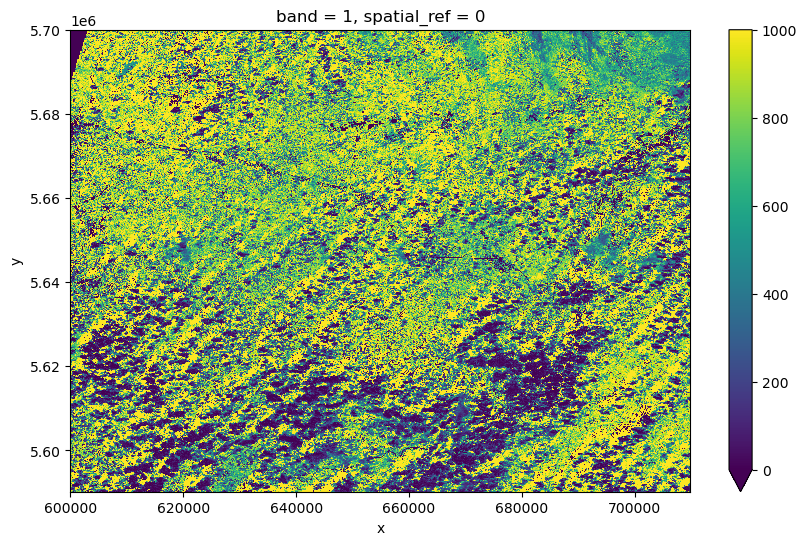

In [21]:
da.isel(band=0).plot.imshow(figsize=(10, 6), vmin=0, vmax=1000)